# <div style="font-size: xxx-large">Intro to <span style="color: cyan">Functional Programming</span> in Python</div>
---

- Functions are first-class citizens
- Iterators
- Generators
- List comprehensions
- Closures
- Lambda expressions
- Higher Order functions
  - Standard Library Higher Order Functions
    - map()
    - filter()
    - reduce()
  - Lazy Evaluation
  - Functools
  - Itertools
  - Currying (Schoenfinkelisation)
- Decorators
  - Function Decorators
  - Objects as Decorators

----
# Functions are first-class citizens

In [ ]:
def print_log(message):
    print(message)
    
def noop_log(message):
    pass

def get_log(mode):
    if env_mode=="dev":
        return print_log
    else: 
        return noop_log

In [ ]:
env_mode="dev"

log=get_log(env_mode)

In [ ]:
x=4
log(f'x is {x}')
x*=x
log(f'x is now {x}')

In [ ]:
env_mode="prod"

log=get_log(env_mode)

In [ ]:
x=4
log(f'x is {x}')
x*=x
log(f'x is now {x}')

In [1]:
import pandas as pd
import numpy as np

def between(x, low, high):
    return x >= low and x <= high

s = pd.Series(np.random.randint(0, 10, 10))
s

0    8
1    8
2    0
3    5
4    1
5    6
6    1
7    3
8    2
9    6
dtype: int32

In [2]:
s.apply(between, args=(3,6))

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7     True
8    False
9     True
dtype: bool

In [3]:
s.apply(between, low = 3, high = 6)

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7     True
8    False
9     True
dtype: bool

----

## Iterators

- *__iter__()* is a container method returning an iterator
- Iterators have a *__next__()* method
- On iteration end - the exception _StopIteration_ is thrown

In [4]:
l = list(range(5))

for i in l:
    print(i)

0
1
2
3
4


In [5]:
class Reverse():    
    def __init__(self, data):
        self.data = data
        self.index = len(data)
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.index == 0:
            raise StopIteration
        self.index = self.index-1
        return self.data[self.index]
    
for char in Reverse('Python'):
    print (char)

n
o
h
t
y
P


## Generators

- create iterators
- using *yield*
- Autogenerated *__next__* returns to the place it left

In [6]:
def reverse(data):
    for index in range(len(data)-1, -1, -1):
        yield data[index]
        
for char in reverse('Python'):
    print (char)

n
o
h
t
y
P


In [7]:
def fib(n):
    if n == 0 or n == 1:
        return n
    else:
        return fib(n-1) + fib(n-2)
        
for i in range(35):
    print ("n=%d => %d" % (i, fib(i)))

n=0 => 0
n=1 => 1
n=2 => 1
n=3 => 2
n=4 => 3
n=5 => 5
n=6 => 8
n=7 => 13
n=8 => 21
n=9 => 34
n=10 => 55
n=11 => 89
n=12 => 144
n=13 => 233
n=14 => 377
n=15 => 610
n=16 => 987
n=17 => 1597
n=18 => 2584
n=19 => 4181
n=20 => 6765
n=21 => 10946
n=22 => 17711
n=23 => 28657
n=24 => 46368
n=25 => 75025
n=26 => 121393
n=27 => 196418
n=28 => 317811
n=29 => 514229
n=30 => 832040
n=31 => 1346269
n=32 => 2178309
n=33 => 3524578
n=34 => 5702887


In [8]:
def fib(n):
    a, b = 0, 1
    i=0
    while i < n:
        yield (i, a)
        a, b = b, a + b
        i += 1

for i, f in fib(35):
    print ("n=%d => %d" % (i, f))

n=0 => 0
n=1 => 1
n=2 => 1
n=3 => 2
n=4 => 3
n=5 => 5
n=6 => 8
n=7 => 13
n=8 => 21
n=9 => 34
n=10 => 55
n=11 => 89
n=12 => 144
n=13 => 233
n=14 => 377
n=15 => 610
n=16 => 987
n=17 => 1597
n=18 => 2584
n=19 => 4181
n=20 => 6765
n=21 => 10946
n=22 => 17711
n=23 => 28657
n=24 => 46368
n=25 => 75025
n=26 => 121393
n=27 => 196418
n=28 => 317811
n=29 => 514229
n=30 => 832040
n=31 => 1346269
n=32 => 2178309
n=33 => 3524578
n=34 => 5702887


### Generator expressions

In [ ]:
(x*x for x in range(10))

In [ ]:
(x*y for x in range(10) for y in range(5))

In [ ]:
(x*x for x in range(10) if x % 2 == 0)

##  <div style="text-align: center">List + Generator Expression</div>

## $$=$$

##  <div style="text-align: center">List comprehension</div>

In [9]:
[x*y for x in range(4) for y in range(5)]

[0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 0, 2, 4, 6, 8, 0, 3, 6, 9, 12]

---

# Closures

In [10]:
def add():
    c = 1 
    c = c + 2
    print(c)

add()

3


In [11]:
c = 1 # global variable
    
def add():
    c = c + 2 # ERROR!
    print(c)

add()

UnboundLocalError: local variable 'c' referenced before assignment

In [12]:
c = 1 # global variable
    
def add():
    global c
    c = c + 2 # NO ERROR!
    print(c)

add()

3


In [13]:
def makeinc(x):
    def inc(y):
        return y+x
    return inc

inc5 = makeinc(5)


In [14]:
inc10 = makeinc(10)

In [15]:
inc10(2)

12

In [16]:
inc5(2)

7

In [17]:
def outer():
    y = 0
    def inner():
        nonlocal y
        y=y+1
        return y
    return inner

f = outer()
print ( f(), f(), f() )

1 2 3


---

# Lambda expressions

In [18]:
def f():
    print ("!")
    
g = f

g()

!


In [19]:
g = lambda: print ("!")

g()

!


In [20]:
a=list(range(-5,0,2))+list(range(0,6,2))
print(a)

[-5, -3, -1, 0, 2, 4]


In [21]:
def square(x):
    return x*x

sorted(a,key = square)

[0, -1, 2, -3, 4, -5]

In [22]:
sorted(a,key = lambda x: x*x)

[0, -1, 2, -3, 4, -5]

## Just one python expression in lambda
---
## ... or maybe more ?

In [23]:
pr = lambda s:s
namenum = lambda x: (x==1 and pr("one")) or (x==2 and pr("two")) or (pr("other"))

namenum(1)

'one'

In [24]:
def echo_IMP():
    while 1:
        x = input("IMP ")
        if x == 'quit':
            break
        else:
            print (x)
            
echo_IMP()

IMP  1


1


IMP  2


2


IMP  3


3


IMP  quit


In [25]:
def monadic_print(x):
    print (x)
    return x

echo_FP = lambda: monadic_print(input("FP "))=='quit' or echo_FP()

echo_FP()

FP  1


1


FP  2


2


FP  3


3


FP  quit


quit


True

In [26]:
import pandas as pd
import numpy as np

N=5

df = pd.DataFrame([ 
    [ row + col for col in range(1,N+1)]
    for row in range(0,N+1)
])

df.columns = [ f'{i}' for i in range(1,N+1)]
df = df.iloc[1:]
df

,1,2,3,4,5
1,2,3,4,5,6
2,3,4,5,6,7
3,4,5,6,7,8
4,5,6,7,8,9
5,6,7,8,9,10


In [27]:
df.applymap(lambda x: x*x)

,1,2,3,4,5
1,4,9,16,25,36
2,9,16,25,36,49
3,16,25,36,49,64
4,25,36,49,64,81
5,36,49,64,81,100


---

# Higher Order functions

## Map, filter, reduce

![title](rossum.jpg)

In [28]:
func = lambda x: x*x
seq = range(15)

print (list(
    map( func, seq )
))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196]


In [29]:
func = lambda x: x%2 == 0
seq = range(15)

print (list(
    filter( func, seq )
))

[0, 2, 4, 6, 8, 10, 12, 14]


In [30]:
print (list(
    map(lambda x: x*x, filter( lambda x: x%2==0, range(15) ))
))

[0, 4, 16, 36, 64, 100, 144, 196]


In [31]:
[ x*x for x in range(15) if x%2==0]

[0, 4, 16, 36, 64, 100, 144, 196]

... but higher order functions are *lazy*

### Lazy Evaluation

In [32]:
range(15)

range(0, 15)

In [33]:
func = lambda x: x*x
seq = range(15)

print (
    map( func, seq )
)

In [34]:
list(map( func, seq ))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196]

In [35]:
sum(range(15))

105

In [36]:
from functools import reduce

func = lambda x,y: x+y
seq = range(15)

reduce( func, seq )

105

In [37]:
from functools import reduce

def func(x, y):
    print(f'x: {x}, y: {y}')
    return x+y

seq = range(15)

reduce( func, seq )

x: 0, y: 1
x: 1, y: 2
x: 3, y: 3
x: 6, y: 4
x: 10, y: 5
x: 15, y: 6
x: 21, y: 7
x: 28, y: 8
x: 36, y: 9
x: 45, y: 10
x: 55, y: 11
x: 66, y: 12
x: 78, y: 13
x: 91, y: 14


105

In [38]:
f = lambda a,b: a if (a > b) else b
reduce(f, [47,11,42,302,13])

302

In [39]:
reduce(lambda x,y: x+' '+y, ['a','bb','ccc','dddd'])

'a bb ccc dddd'

In [40]:
reduce(lambda x,y: x+' '+y, ['a','bb','ccc','dddd'], 'Result:')

'Result: a bb ccc dddd'

----
### Operator package

In [41]:
from operator import add

reduce(add, range(15))

105

In [42]:
from operator import itemgetter

a = list(zip(range(15), range(15,0,-1)))
print(a)

[(0, 15), (1, 14), (2, 13), (3, 12), (4, 11), (5, 10), (6, 9), (7, 8), (8, 7), (9, 6), (10, 5), (11, 4), (12, 3), (13, 2), (14, 1)]


In [43]:
print(sorted(a, key = itemgetter(1)))

[(14, 1), (13, 2), (12, 3), (11, 4), (10, 5), (9, 6), (8, 7), (7, 8), (6, 9), (5, 10), (4, 11), (3, 12), (2, 13), (1, 14), (0, 15)]


---

In [46]:
from functools import partial

basetwo = partial(int, base=2)
basetwo.__doc__ = 'Convert base 2 string to an int.'
basetwo('10010')

18

In [45]:
int("1000", base=2)

8

### Currying / Shönfinkelisation

Haskell Curry (1900-1982) → Currying

Moses Ilyich Schönfinkel (1889-1942)

In [47]:
import pandas as pd
import numpy as np

N=5

df = pd.DataFrame([ 
    [ row * col for col in range(1,N+1)]
    for row in range(0,N+1)
])

df.columns = [ f'{i}' for i in range(1,N+1)]
df = df.iloc[1:]
df

,1,2,3,4,5
1,1,2,3,4,5
2,2,4,6,8,10
3,3,6,9,12,15
4,4,8,12,16,20
5,5,10,15,20,25


In [48]:
format(9,"b")

'1001'

In [49]:
from operator import pow

def my_format(value, sformat):
    return format(value, sformat)

def my_pow(base, exponant):
    return pow(base, exponant)

In [50]:
import functools

def compose(*functions):
    return functools.reduce(lambda f, g: lambda x: f(g(x)), functions, lambda x: x)

$$
compose(f, g, h) = f \circ g \circ h
$$

$$
(f \circ g \circ h)(x) = f(g(h(x)))
$$

In [51]:
df.applymap(functools.partial(my_format, sformat="b"))

,1,2,3,4,5
1,1,10,11,100,101
2,10,100,110,1000,1010
3,11,110,1001,1100,1111
4,100,1000,1100,10000,10100
5,101,1010,1111,10100,11001


In [52]:
df.applymap(
    compose(
        functools.partial(
            my_format, sformat="b"
        ), 
        np.square
    )
)

,1,2,3,4,5
1,1,100,1001,10000,11001
2,100,10000,100100,1000000,1100100
3,1001,100100,1010001,10010000,11100001
4,10000,1000000,10010000,100000000,110010000
5,11001,1100100,11100001,110010000,1001110001


In [53]:
df.applymap(
    compose(
        partial(
            my_format, sformat="b"
        ), 
        np.square
    )
)

,1,2,3,4,5
1,1,100,1001,10000,11001
2,100,10000,100100,1000000,1100100
3,1001,100100,1010001,10010000,11100001
4,10000,1000000,10010000,100000000,110010000
5,11001,1100100,11100001,110010000,1001110001


In [54]:
df.applymap(
    compose(
        partial(
            my_format, sformat="b"
        ), 
        partial(
            my_pow, exponant=2
        )
    )
)

,1,2,3,4,5
1,1,100,1001,10000,11001
2,100,10000,100100,1000000,1100100
3,1001,100100,1010001,10010000,11100001
4,10000,1000000,10010000,100000000,110010000
5,11001,1100100,11100001,110010000,1001110001


---
### Itertools package

In [55]:
from itertools import product

print (list(product('ABCD', repeat=2)))

[('A', 'A'), ('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'C'), ('C', 'D'), ('D', 'A'), ('D', 'B'), ('D', 'C'), ('D', 'D')]


In [56]:
from itertools import permutations

print (list(permutations('ABCD',  2)))

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'A'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'D'), ('D', 'A'), ('D', 'B'), ('D', 'C')]


In [57]:
from itertools import combinations

print (list(combinations('ABCD',  2)))

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]


In [58]:
from itertools import dropwhile, chain, starmap, takewhile

In [59]:
list(dropwhile(lambda x: x<5, [1,4,6,4,1]))

[6, 4, 1]

In [60]:
list(chain('ABC', 'DEF'))

['A', 'B', 'C', 'D', 'E', 'F']

In [62]:
list(starmap(pow, [(2,5), (3,2), (10,3)]))

[32, 9, 1000]

In [63]:
list(takewhile(lambda x: x<5, [1,4,6,4,1]))

[1, 4]

In [64]:
list(zip("abcd",range(4)))

[('a', 0), ('b', 1), ('c', 2), ('d', 3)]

---

# Decorators

```python
@dec2
@dec1
def func(arg1, arg2, ...):
    pass

# is the same as:

def func(arg1, arg2, ...):
    pass

func = dec2(dec1(func))
```

In [65]:
def entryExit(f):
    def new_f():
        print ("Entering", f.__name__)
        f()
        print ("Exited", f.__name__)
    return new_f

@entryExit
def func1():
    print ("inside func1()")
    return 
    
func1()

Entering func1
inside func1()
Exited func1


In [66]:
import time 
import math 
  
def calculate_time(func): 
    def inner1(*args, **kwargs): 
        begin = time.time() 
        func(*args, **kwargs) 
        end = time.time() 
        print("Total time taken in : ", func.__name__, end - begin) 
    return inner1 
  
@calculate_time
def factorial(num): 
    time.sleep(2) 
    print(math.factorial(num)) 

    
factorial(10) 

3628800
Total time taken in :  factorial 2.0199878215789795


In [67]:
class C_entryExit():
    def __init__(self, f):
        self.f = f
        self.n = 0
    def __call__(self):
        self.n+=1
        print ("Entering", self.f.__name__)
        self.f()
        print ("Exited", self.f.__name__)
        print ("Run times:", self.n)

@C_entryExit
def func1():
    print ("inside func1()")
    
func1()
func1()
func1()

Entering func1
inside func1()
Exited func1
Run times: 1
Entering func1
inside func1()
Exited func1
Run times: 2
Entering func1
inside func1()
Exited func1
Run times: 3


```python
@decorator(arg)
f()

# is the same as:


f = (decorator(arg))(f)
```

In [68]:
from functools import wraps
def user_has_permission(permission):
    return permission=='ADMIN'

class PermissionException(Exception):
    def __init__(self, message):
        super().__init__(message)

def authorize(permission=None):
    def _authorize(_func):
        @wraps(_func)
        def wrapper(*args, **kwargs):
            if permission:
                if user_has_permission(permission):
                    return _func(*args, **kwargs)
                else:
                    raise PermissionException(f"No {permission} rights")
        return wrapper
    return _authorize
                

In [69]:
@authorize("ADMIN")
def f():
    print("I am ROOT")
    
@authorize("SUPERADMIN")
def g():
    print("I am GROOT")

In [70]:
f()

I am ROOT


In [71]:
g()

PermissionException: No SUPERADMIN rights

In [72]:
print(f.__name__)

f


---

# Numerical differentiation using decorators

### *Machine epsilon* is defined as the difference between *1* and the next larger floating point number



In [73]:
epsilon = 1.0 
while (1.0 + 0.5 * epsilon) != 1.0:
    epsilon = 0.5 * epsilon

epsilon

2.220446049250313e-16

In [74]:
import numpy as np

print(np.finfo(float).eps)

2.220446049250313e-16


In [75]:
np.power(2.0,-52)

2.220446049250313e-16

## Pochodne funkcji

$$
 f'(x) = \lim_{ \epsilon \to 0} \frac{f(x+\epsilon) -f(x)}{\epsilon}
$$


![Differential](Derivative.svg.png)

https://en.wikipedia.org/wiki/Numerical_differentiation

$$
f'(x) \approx \frac{f(x+h) -f(x)}{h}
$$

## Or better:

$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
$$

## Basic definition of `h`
$$
h = \sqrt\epsilon \, |x|
$$

## Or better (for avoiding division by zero)

$$
h = \sqrt\epsilon \; max(\,|x|\,+\sqrt\epsilon\,)
$$



In [76]:
import numpy as np

eps = np.finfo(float).eps
sqrteps = np.sqrt(eps)

def derivative(f):
    def inner(x):        
        h = sqrteps * max( abs(x), sqrteps )
        return ( f(x+h) - f(x-h) ) / (2*h)
    return inner

@derivative    
def square(x):
    return x*x

In [77]:
square(1)

2.0

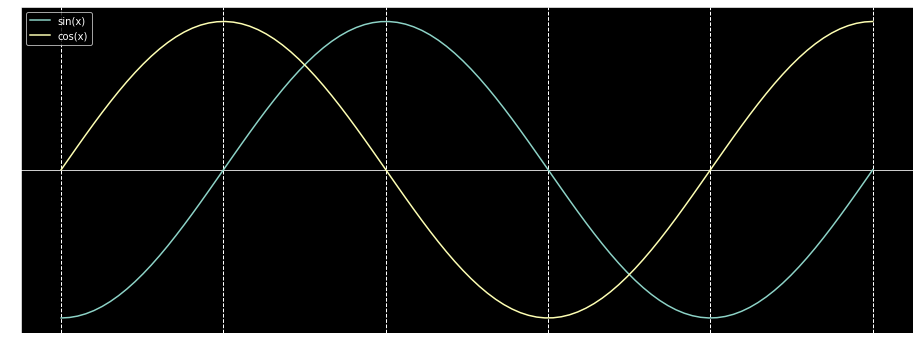

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tck

fig = plt.figure(figsize=(16,6))
plt.style.use("dark_background")
ax = fig.gca()
plt.rc('grid', linestyle="-", color='white')
x = np.linspace(-0.5, 2, 100)
plt.grid(True)
ax.set_yticks(np.arange(0, 1., 2))

ax.xaxis.grid(True,'major',linewidth=1)
ax.yaxis.grid(True,'minor',linewidth=1)
ax.xaxis.grid(True,'major',linestyle="--")

ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))

line, = plt.plot(x, np.sin(x*np.pi))
line.set_label('sin(x)')
line, = plt.plot(x, np.cos(x*np.pi))
line.set_label('cos(x)')
ax.legend();


In [79]:
@derivative    
def sine_derivative(x):
    return np.sin(x)

In [80]:
sine_derivative(np.pi/2)

0.0

In [81]:
sine_derivative(0)

1.0

In [ ]:
https://realpython.com/primer-on-python-decorators/#more-real-world-examples